<a href="https://colab.research.google.com/github/raissamiranda/Pampulha-Database-Search/blob/main/SQL_search_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pesquisa de Percepção dos Moradores de Belo Horizonte sobre o Complexo da Pampulha



# 2. Membros: 


*   Gabriel Alves Reis - 2020006507

*   Gabriel Castelo Branco Rocha Alencar Pinto - 2020006523
*  Luisa Vasconcelos de Castro Toledo - 2020006795


*   Raissa Miranda Maciel - 2020006965



# 3. Descrição dos Dados
O banco de dados, retirado do portal do governo, possuía, originalmente, uma única tabela com 111 atributos. Dessa forma, analisamos os atributos e escolhemos os mais proveitosos para criarmos 7 tabelas, utilizando os conceitos aprendidos de normalização. Nesse processo, alteramos nomes dos atributos, criamos identificadores para região e transporte e substituímos instâncias vazias por nulas, a fim de aprimorar as consultas realizadas. Essas informações são melhor visualizadas no diagrama ER apresentado na seção 4.


# 4. Diagrama ER 
OBS: Com o tema escuro (Dark Mode) as cardinalidades ficam escondidas.

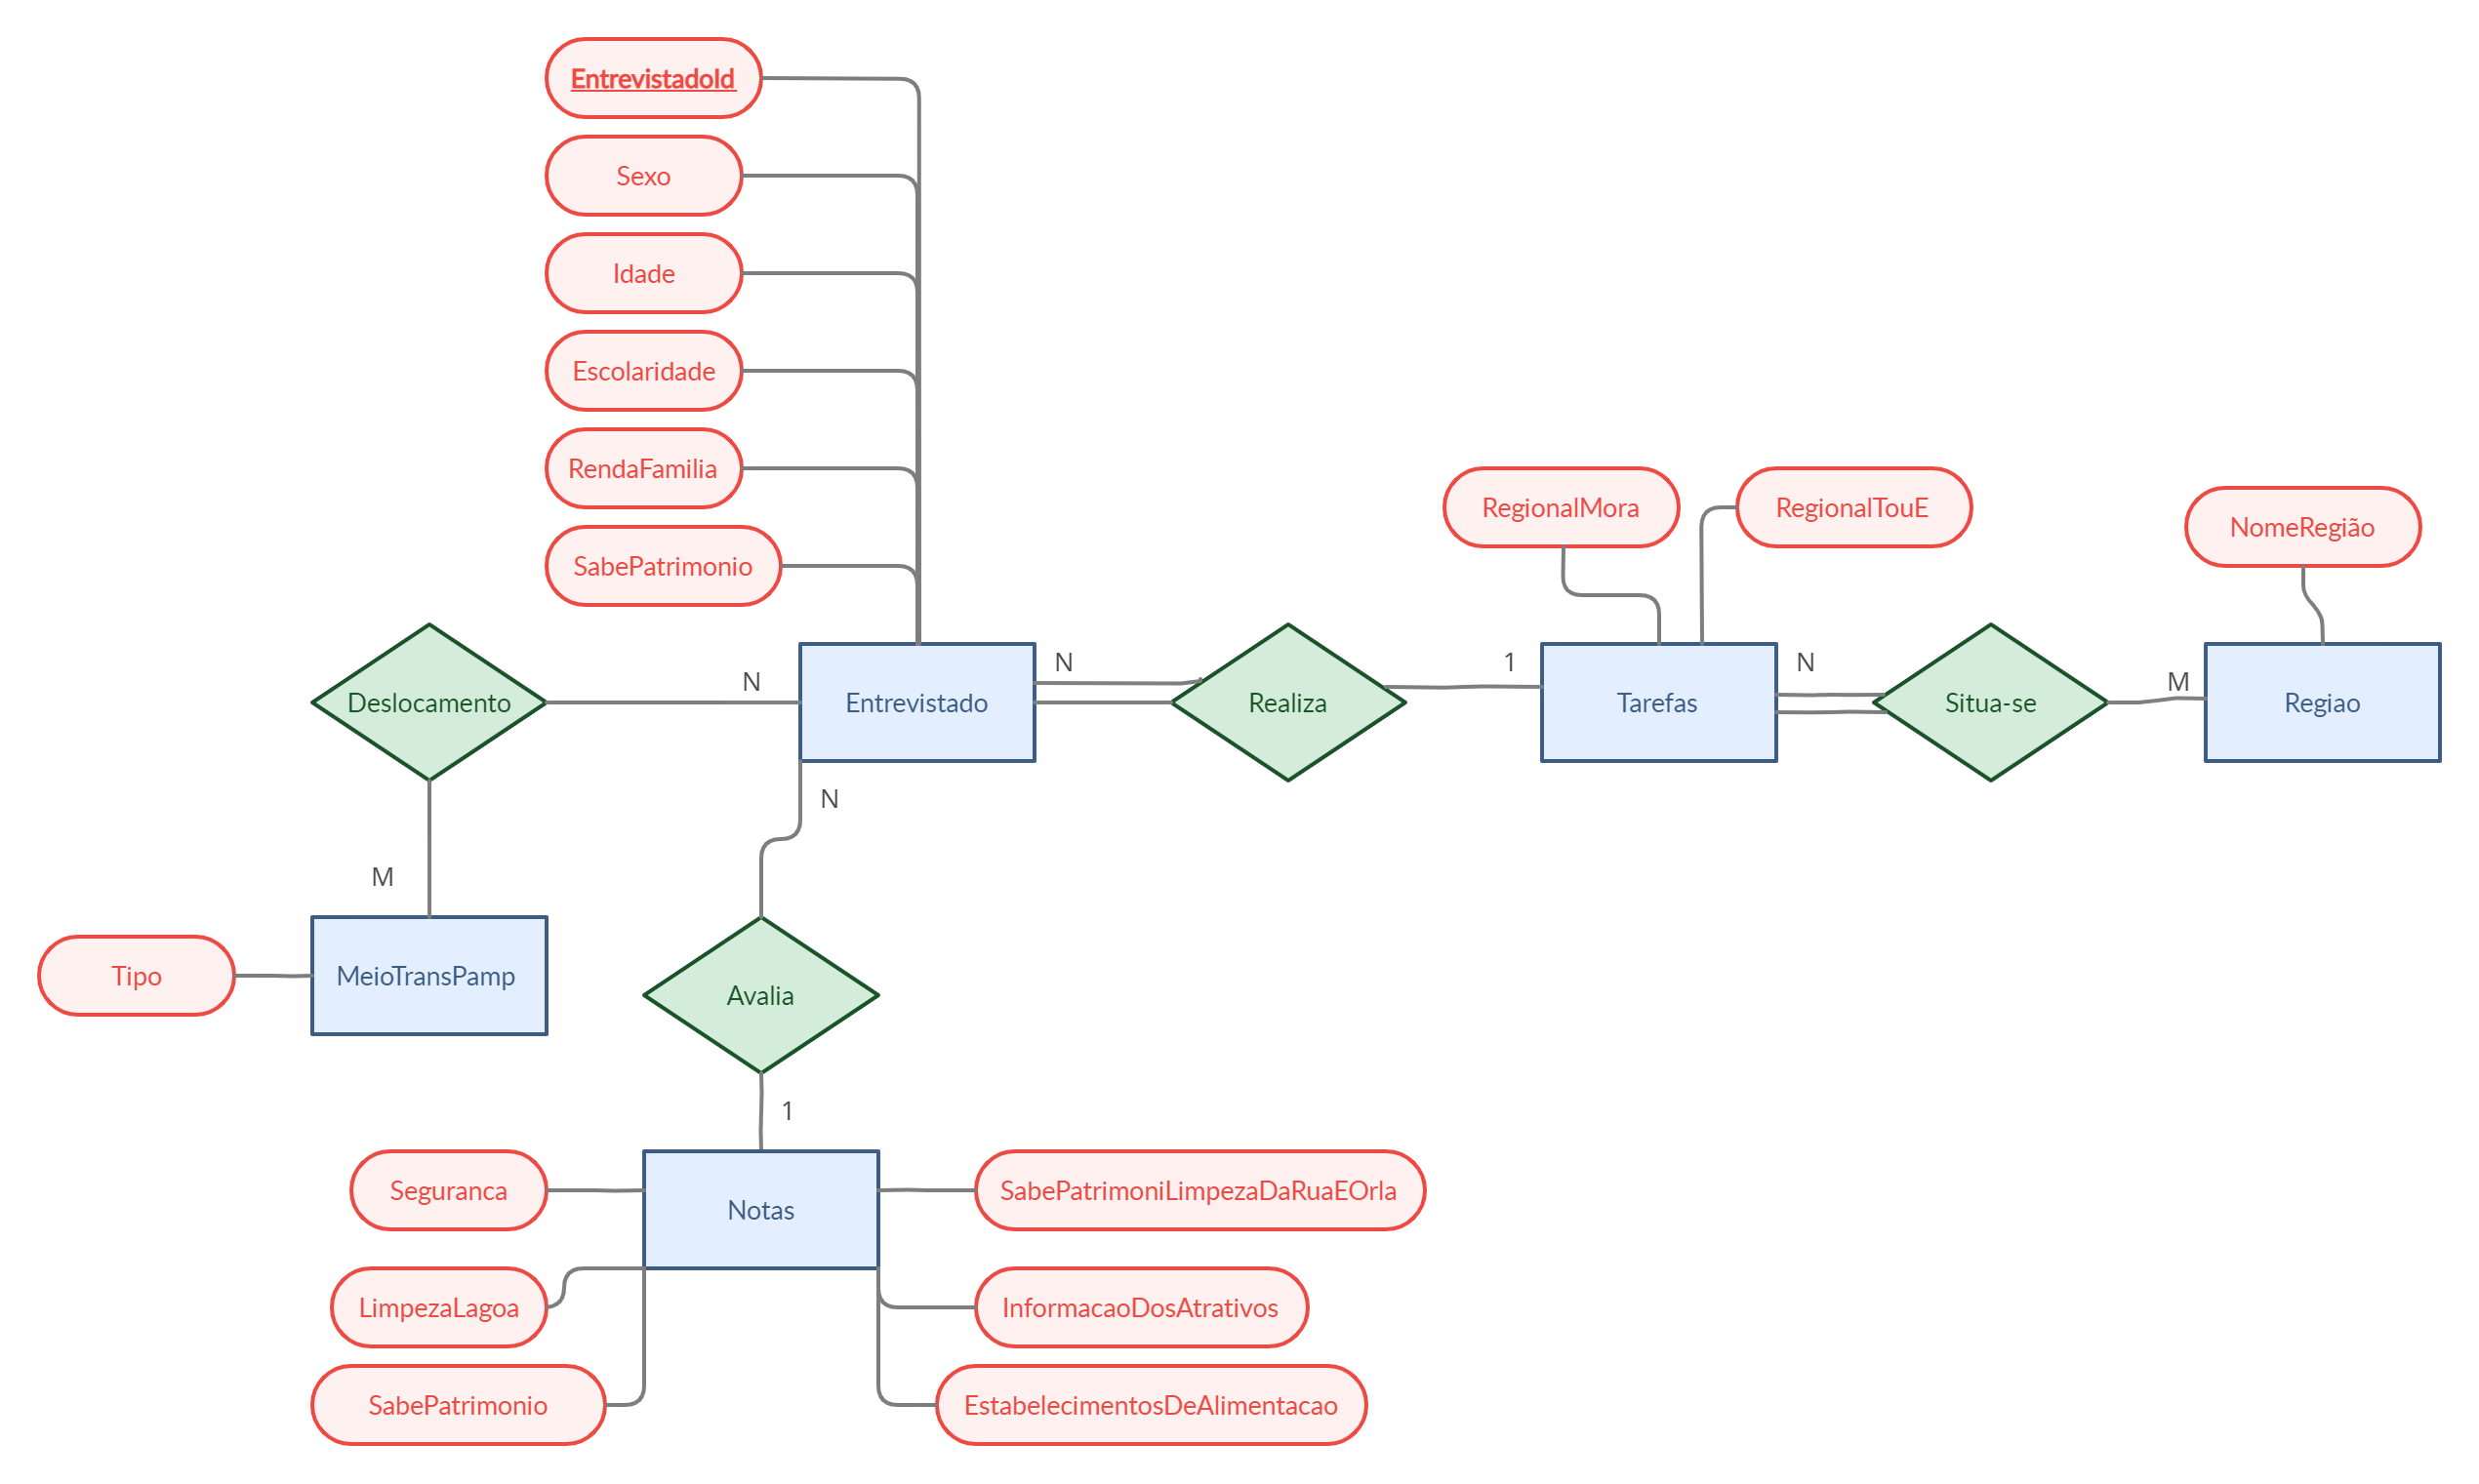

# 5. Diagrama relacional 
 OBS: Com o tema escuro (DarkMode), o nome das tabelas ficam escondidos

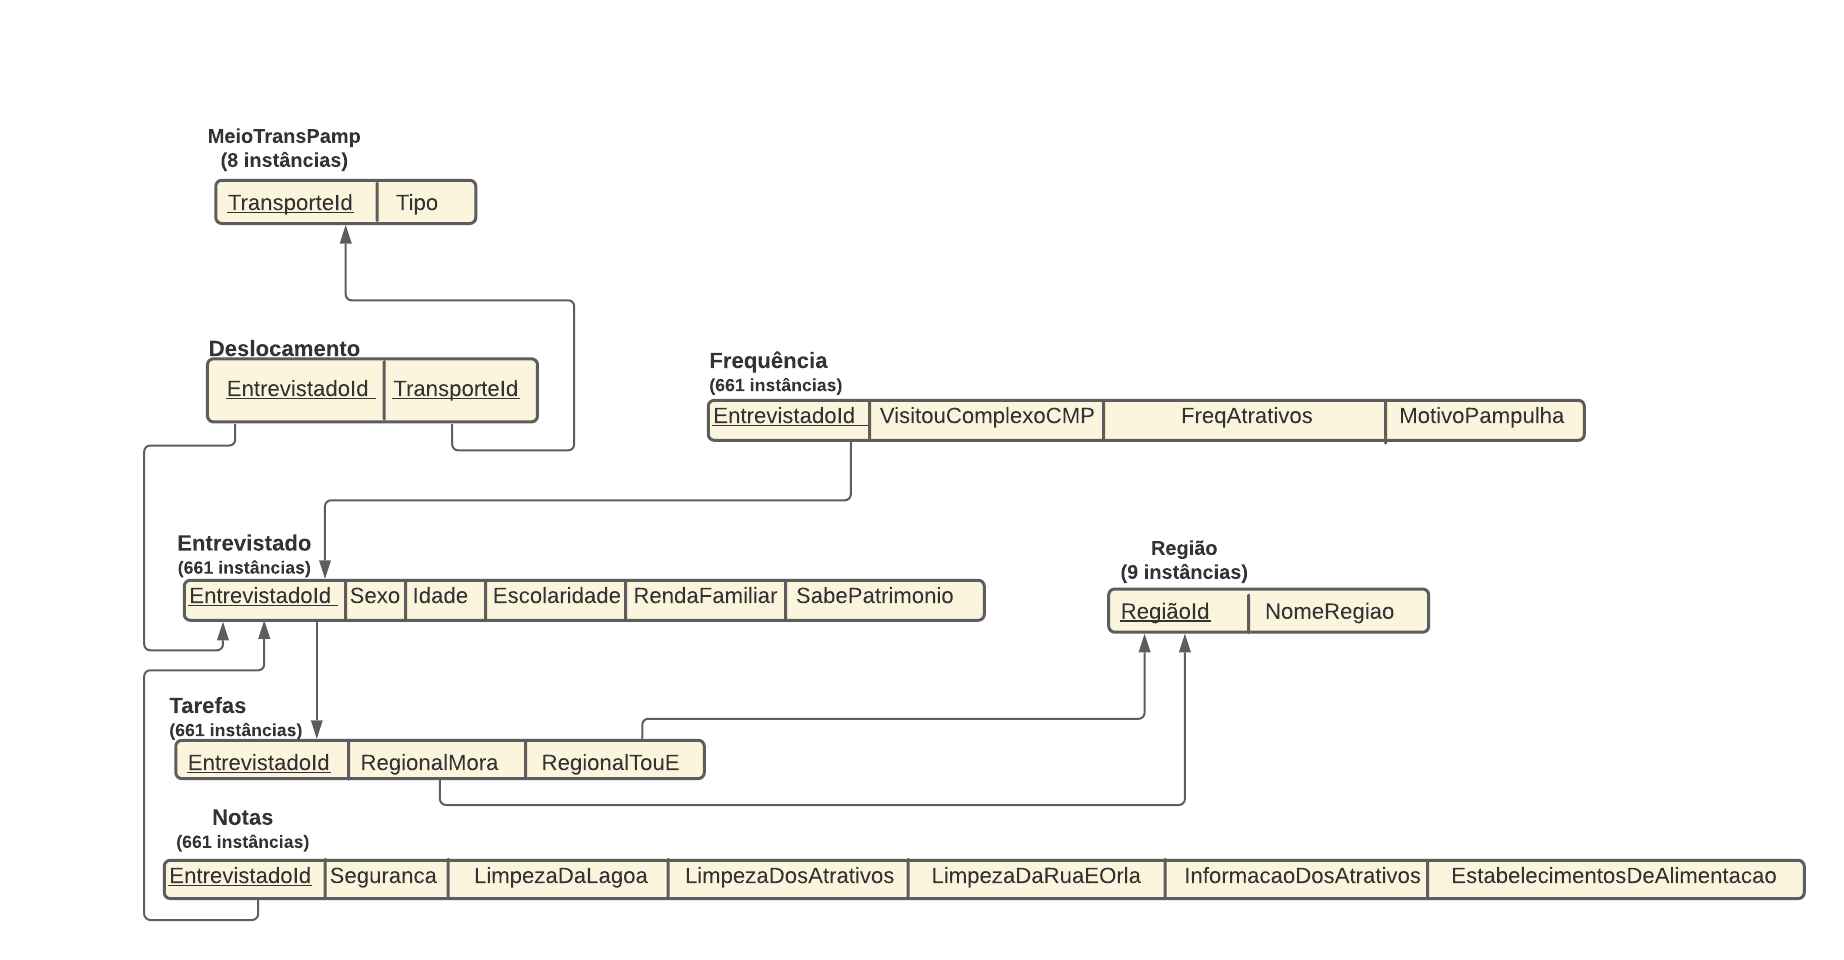

# 6. Consultas
 Com a utilização do comando mágico %%timeit (comentado no início das células), percebemos que as consultas se tornam mais eficientes quando filtramos as instâncias relevantes antes de realizar as junções, isto porque é necessário relacionar uma menor quantidade de informações entre as tabelas. 


In [4]:
import io
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open('/tmp/PesquisaPampulha.sql', 'r', encoding='utf-8')

sql = f.read()
cursor.executescript(sql)

## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)
As duas células que se seguem são relativas à quantidade de pessoas que   frequentam a Pampulha, agrupadas por motivo, em ordem decrescente.

In [6]:
#%%timeit
query1 = """
SELECT
  COUNT(MotivoPampulha) AS Quantidade, MotivoPampulha
FROM
  Frequencia
WHERE
  MotivoPampulha != ''
GROUP BY
  MotivoPampulha
ORDER BY
  Quantidade DESC
"""

df = pd.read_sql_query(query1, conn)
df

,Quantidade,MotivoPampulha
0,430,Lazer_passeio
1,108,Praticar esporte
2,64,Mineirao_Jogo
3,24,Outro _especifique_
4,22,Trabalho
5,14,Participar de evento
6,8,Visitar os atrativos
7,4,Visitar o Patrimonio da Humanidade
8,4,Gastronomia
9,2,NS_NR


In [7]:
#%%timeit
query2 = """
SELECT
  COUNT(MotivoPampulha) AS Quantidade, MotivoPampulha
FROM
  Frequencia
WHERE
  MotivoPampulha IS NOT (
      SELECT DISTINCT
        MotivoPampulha
      FROM
        Frequencia
      WHERE
        VisitouComplexoCMP = 'Nao'
        OR
        FreqAtrativos = 'Nao frequento' OR  FreqAtrativos = 'NS_NR'
  ) 
GROUP BY
  MotivoPampulha
ORDER BY
  Quantidade DESC
"""

df = pd.read_sql_query(query2, conn)
df

,Quantidade,MotivoPampulha
0,430,Lazer_passeio
1,108,Praticar esporte
2,64,Mineirao_Jogo
3,24,Outro _especifique_
4,22,Trabalho
5,14,Participar de evento
6,8,Visitar os atrativos
7,4,Visitar o Patrimonio da Humanidade
8,4,Gastronomia
9,2,NS_NR


### 6.1.2 Consulta 2 (duas versões)
Em seguida, são apresentadas duas consultas referentes à média das notas de cada categoria das pessoas que já visitaram o complexo da Pampulha

In [8]:
#%%timeit
query3 = """
SELECT
  AVG(Seguranca) AS Media_Seguranca,
  AVG(LimpezaDaLagoa) AS Media_Limpeza_Da_Lagoa,
  AVG(LimpezaDosAtrativos) AS Media_Limpeza_Dos_Atrativos,
  AVG(LimpezaDaRuaEOrla) AS Media_Limpeza_Da_Rua_E_Orla,
  AVG(InformacaoDosAtrativos) AS Media_Informacao_Dos_Atrativos 
FROM
  Frequencia NATURAL JOIN Notas
WHERE
  visitouComplexoCMP = 'Sim'
"""

df = pd.read_sql_query(query3, conn)
df

,Media_Seguranca,Media_Limpeza_Da_Lagoa,Media_Limpeza_Dos_Atrativos,Media_Limpeza_Da_Rua_E_Orla,Media_Informacao_Dos_Atrativos
0,6.9375,3.904192,7.26506,7.307692,7.308176


In [9]:
#%%timeit
query4 = """
SELECT
  AVG(Seguranca) AS Media_Seguranca,
  AVG(LimpezaDaLagoa) AS Media_Limpeza_Da_Lagoa,
  AVG(LimpezaDosAtrativos) AS Media_Limpeza_Dos_Atrativos,
  AVG(LimpezaDaRuaEOrla) AS Media_Limpeza_Da_Rua_E_Orla,
  AVG(InformacaoDosAtrativos) AS Media_Informacao_Dos_Atrativos 
FROM
  Frequencia AS F, Notas AS N
WHERE
  F.EntrevistadoId = N.EntrevistadoId
  AND
  visitouComplexoCMP = 'Sim'
"""

df = pd.read_sql_query(query4, conn)
df

,Media_Seguranca,Media_Limpeza_Da_Lagoa,Media_Limpeza_Dos_Atrativos,Media_Limpeza_Da_Rua_E_Orla,Media_Informacao_Dos_Atrativos
0,6.9375,3.904192,7.26506,7.307692,7.308176


## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)
As duas céluas a seguir apresentam a lista de ID's de pessoas com mais de 50  anos que frequentam a região da Pampulha uma vez por ano

In [10]:
#%%timeit
query5 = """
SELECT
  E.EntrevistadoId
FROM
  Entrevistado as E NATURAL JOIN Frequencia as F
WHERE
  Idade > 50 AND FreqAtrativos = 'Uma vez por ano'
"""

df = pd.read_sql_query(query5, conn)
df

,EntrevistadoId
0,11191338482
1,11191338482
2,11188571079
3,11188571079
4,11187966922
...,...
91,11176551456
92,11176504859
93,11176504859
94,11175986212


In [11]:
#%%timeit
query6 = """
SELECT DISTINCT
  E.EntrevistadoId as ID
FROM
  Entrevistado as E, Frequencia as F
WHERE
  E.EntrevistadoID = F.EntrevistadoID 
  AND
  Idade > 50 AND FreqAtrativos = 'Uma vez por ano'
"""

df = pd.read_sql_query(query6, conn)
df


,ID
0,11191338482
1,11188571079
2,11187966922
3,11187918050
4,11187889785
5,11187813009
6,11186421964
7,11186279873
8,11186147991
9,11185123485


### 6.2.2 Consulta 4 (duas versões)
Nos próximos dois tópicos, são desenvolvidas consultas que apresentam a lista de ID's de indivíduos que trabalham em uma região diferente daquela que residem

In [12]:
#%%timeit
query7 = """
SELECT DISTINCT
  E.EntrevistadoId
FROM
  Entrevistado as E, Tarefas as T
WHERE
  E.EntrevistadoID = T.EntrevistadoID 
  AND
  RegionalMora != RegionalTouE
  AND
  RegionalMora IS NOT NULL
  AND
  RegionalTouE IS NOT NULL
"""

df = pd.read_sql_query(query7, conn)
df

,EntrevistadoId
0,11196632526
1,11196209652
2,11195955258
3,11195179464
4,11195179225
...,...
118,11176594485
119,11176535785
120,11176457360
121,11176176050


In [13]:
#%%timeit
query8 = """
SELECT DISTINCT
  E.EntrevistadoId
FROM
  Entrevistado as E, Tarefas as T
WHERE
  E.EntrevistadoId = T.EntrevistadoId
  AND  
  E.EntrevistadoId NOT IN (
    SELECT
      EntrevistadoId
    FROM
      Entrevistado NATURAL JOIN Tarefas
    WHERE
      RegionalMora = RegionalTouE 
      OR
      RegionalMora IS NULL OR RegionalTouE IS NULL
  )

"""

df = pd.read_sql_query(query8, conn)
df

,EntrevistadoId
0,11196632526
1,11196209652
2,11195955258
3,11195179464
4,11195179225
...,...
118,11176594485
119,11176535785
120,11176457360
121,11176176050


### 6.2.3 Consulta 5 (duas versões)
As próximas duas consultas apresentam a lista de ID's de pessoas cujo meio de locomoção para a Pampulha é carro

In [14]:
#%%timeit
query9 = """
SELECT
  EntrevistadoId
FROM
  Deslocamento NATURAL JOIN MeioTransPamp
WHERE
  Tipo = 'Carro'
ORDER BY
  EntrevistadoId
"""

df = pd.read_sql_query(query9, conn)
df

,EntrevistadoId
0,11175868883
1,11175868883
2,11175868883
3,11175868883
4,11175877344
...,...
963,11196412624
964,11196632526
965,11196632526
966,11196632526


In [15]:
#%%timeit
query10 = """
SELECT
  EntrevistadoId
FROM
  Deslocamento
WHERE
  TransporteId IS (
    SELECT
      TransporteId
    FROM
      MeioTransPamp
    WHERE
      Tipo = 'Carro'
  )
ORDER BY
  EntrevistadoId
"""

df = pd.read_sql_query(query10, conn)
df

,EntrevistadoId
0,11175868883
1,11175868883
2,11175877344
3,11175877344
4,11175986212
...,...
479,11196209652
480,11196412624
481,11196412624
482,11196632526


## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)
A seguir são desenvolvidas as duas formas de consultar a lista de meios de transporte mais utilizados pelas mulheres

In [16]:
#%%timeit
query11 = """
SELECT
  M.Tipo, COUNT(E.EntrevistadoId) AS 'Quantidade de Mulheres'
FROM
  MeioTransPamp AS M
  JOIN Deslocamento AS D, Entrevistado AS E
  ON M.TransporteId = D.TransporteId 
    AND 
    D.EntrevistadoId = E.EntrevistadoId
WHERE
  E.Sexo = 'Feminino'
GROUP BY
  M.Tipo
ORDER BY
  COUNT(E.EntrevistadoId) DESC

"""

df = pd.read_sql_query(query11, conn)
df

,Tipo,Quantidade de Mulheres
0,Carro,1016
1,Ônibus,296
2,App,136
3,A pé,80
4,Biclicleta,48
5,Moto,40


In [17]:
#%%timeit
query12 = """
SELECT
  Tipo, COUNT(EntrevistadoId) AS 'Quantidade de Mulheres'
FROM
  MeioTransPamp
    NATURAL JOIN Deslocamento
    NATURAL JOIN (
                  SELECT
                    *
                  FROM
                    Entrevistado
                  WHERE
                    Sexo = 'Feminino'
                )
GROUP BY
  Tipo
ORDER BY
  COUNT(EntrevistadoId) DESC

"""

df = pd.read_sql_query(query12, conn)
df

,Tipo,Quantidade de Mulheres
0,Carro,1016
1,Ônibus,296
2,App,136
3,A pé,80
4,Biclicleta,48
5,Moto,40


### 6.3.2 Consulta 7 (duas versões)
Nas próximas células, são mostrados os meios de transporte mais populares entre pessoas cuja renda média é de até 1 salário mínimo

In [18]:
#%%timeit
query13 = """
SELECT Distinct
  Tipo, COUNT(Tipo) AS 'Numero pessoas'
FROM
  Entrevistado
  NATURAL JOIN Deslocamento
  NATURAL JOIN MeioTransPamp
WHERE
  RendaFamiliar = 'Ate 1 SM _ RS 998\,00'
GROUP BY
  Tipo
ORDER BY
  COUNT(Tipo) DESC
"""

df = pd.read_sql_query(query13, conn)
df

,Tipo,Numero pessoas
0,Ônibus,152
1,Carro,88
2,App,40
3,Biclicleta,24
4,Moto,8


In [19]:
#%%timeit
query14 = """
SELECT Distinct
  Tipo, COUNT(Tipo) AS 'Numero pessoas'
FROM
  Deslocamento
  NATURAL JOIN MeioTransPamp
  NATURAL JOIN (
    SELECT
      *
    FROM
      Entrevistado
    WHERE
      RendaFamiliar = 'Ate 1 SM _ RS 998\,00'
  )
GROUP BY
  Tipo
ORDER BY
  COUNT(Tipo) DESC
"""

df = pd.read_sql_query(query14, conn)
df

,Tipo,Numero pessoas
0,Ônibus,152
1,Carro,88
2,App,40
3,Biclicleta,24
4,Moto,8


### 6.3.3 Consulta 8 (duas versões)
Abaixo, foi consultada a avaliação média de serviços e condições da região da Pampulha, separados de acordo com as regiões onde os entrevistados residem

In [20]:
#%%timeit
query15 = """
SELECT
  NomeRegiao,
  AVG(Seguranca) AS Seguranca,
  AVG(LimpezaDaLagoa) AS LimpezaDaLagoa, 
  AVG(LimpezaDosAtrativos) AS LimpezaDosAtrativos, 
  AVG(LimpezaDaRuaEOrla) AS LimpezaDaRuaEOrla, 
  AVG(InformacaoDosAtrativos) AS InformacaoDosAtrativos, 
  AVG(EstabelecimentosDeAlimentacao) AS EstabelecimentosDeAlimentacao
FROM
  Tarefas AS T
  JOIN Regiao AS R ON T.RegionalMora = R.RegiaoId 
  NATURAL JOIN Notas
GROUP BY
  NomeRegiao
"""

df = pd.read_sql_query(query15, conn)
df

,NomeRegiao,Seguranca,LimpezaDaLagoa,LimpezaDosAtrativos,LimpezaDaRuaEOrla,InformacaoDosAtrativos,EstabelecimentosDeAlimentacao
0,Barreiro,7.500000,3.555556,7.481481,7.740741,7.962963,6.260870
1,Centro-Sul,6.793103,3.333333,7.076923,6.896552,6.862069,6.370370
2,Leste,7.500000,4.476190,8.347826,7.826087,8.428571,7.684211
3,Nordeste,6.813953,3.595238,7.400000,7.738095,7.315789,5.950000
4,Noroeste,6.763636,3.527273,7.388889,7.254545,7.264151,5.960784
5,Norte,6.291667,4.625000,7.043478,7.217391,7.285714,4.409091
6,Oeste,6.716981,3.592593,6.648148,6.833333,6.313725,6.037037
7,Pampulha,6.940000,4.040000,6.880000,7.060000,7.081633,5.959184
8,Venda Nova,7.500000,5.058824,7.828571,7.685714,8.551724,7.156250


In [21]:
#%%timeit
query16 = """
SELECT
  NomeRegiao,
  AVG(Seguranca) AS Seguranca,
  AVG(LimpezaDaLagoa) AS LimpezaDaLagoa, 
  AVG(LimpezaDosAtrativos) AS LimpezaDosAtrativos, 
  AVG(LimpezaDaRuaEOrla) AS LimpezaDaRuaEOrla, 
  AVG(InformacaoDosAtrativos) AS InformacaoDosAtrativos, 
  AVG(EstabelecimentosDeAlimentacao) AS EstabelecimentosDeAlimentacao
FROM
  (SELECT
    *
  FROM
    Tarefas AS T, Regiao AS R
  WHERE
    T.RegionalMora = R.RegiaoId) AS AUX
  JOIN Notas AS N
  ON N.EntrevistadoId = AUX.EntrevistadoId
GROUP BY
  NomeRegiao
"""

df = pd.read_sql_query(query16, conn)
df

,NomeRegiao,Seguranca,LimpezaDaLagoa,LimpezaDosAtrativos,LimpezaDaRuaEOrla,InformacaoDosAtrativos,EstabelecimentosDeAlimentacao
0,Barreiro,7.500000,3.555556,7.481481,7.740741,7.962963,6.260870
1,Centro-Sul,6.793103,3.333333,7.076923,6.896552,6.862069,6.370370
2,Leste,7.500000,4.476190,8.347826,7.826087,8.428571,7.684211
3,Nordeste,6.813953,3.595238,7.400000,7.738095,7.315789,5.950000
4,Noroeste,6.763636,3.527273,7.388889,7.254545,7.264151,5.960784
5,Norte,6.291667,4.625000,7.043478,7.217391,7.285714,4.409091
6,Oeste,6.716981,3.592593,6.648148,6.833333,6.313725,6.037037
7,Pampulha,6.940000,4.040000,6.880000,7.060000,7.081633,5.959184
8,Venda Nova,7.500000,5.058824,7.828571,7.685714,8.551724,7.156250


## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)
Em sequência, será consultada a média das notas, de acordo com o  sexo dos entrevistados, em relação à segurança do complexo da Pampulha

In [22]:
#%%timeit
query17 = """
SELECT
  Sexo, AVG(Seguranca) as Media_Segurança
FROM
  Entrevistado NATURAL JOIN  Notas
WHERE
  Seguranca IS NOT NULL
GROUP BY
  Sexo
"""

df = pd.read_sql_query(query17, conn)
df

,Sexo,Media_Segurança
0,Feminino,6.970060
1,Masculino,6.905325


In [23]:
#%%timeit
query18 = """
SELECT
  E.Sexo, AVG(N.Seguranca) as Media_Segurança
FROM
  Entrevistado AS E
INNER JOIN
  Notas AS N
ON
  E.EntrevistadoId = N.EntrevistadoId
WHERE
  N.Seguranca IS NOT (
    SELECT DISTINCT
      AUX.Seguranca
    FROM 
      Notas AS AUX
    WHERE
      AUX.Seguranca IS NULL
  )
GROUP BY
  Sexo
"""

df = pd.read_sql_query(query18, conn)
df

,Sexo,Media_Segurança
0,Feminino,6.970060
1,Masculino,6.905325


### 6.4.2 Consulta 10 (duas versões)
Consultas referentes ao número de pessoas que visitaram o Complexo da Pampulha, mas não sabem que é patrimônio da UNESCO

In [24]:
#%%timeit
query19 = """
SELECT DISTINCT
  COUNT(*) AS 'Número de Pessoas'
FROM
  Entrevistado NATURAL JOIN Frequencia
WHERE
  SabePatrimonio = 'Nao'
  AND
  VisitouComplexoCMP = 'Sim'

"""

df = pd.read_sql_query(query19, conn)
df

,Número de Pessoas
0,536


In [25]:
#%%timeit
query20 = """
SELECT
  COUNT(*) AS 'Número de Pessoas'
FROM
  (
    SELECT
      EntrevistadoId
    FROM
      Entrevistado
    WHERE
      SabePatrimonio = 'Nao'
  )
  NATURAL JOIN
  (
    SELECT
      EntrevistadoId
    FROM
      Frequencia
    WHERE
      VisitouComplexoCMP = 'Sim'
  )

"""

df = pd.read_sql_query(query20, conn)
df

,Número de Pessoas
0,536


# 7. Autoavaliação dos membros
Todos os integrantes do grupo participaram de todas as etapas do trabalho.


*   Gabriel Alves: Escolha do banco de dados; Moldagem dos diagramas relacional e ER; Formulação e desenvolvimento das consultas e documentação.

*   Gabriel Castelo Branco: Escolha do banco de dados; Moldagem dos diagramas relacional e ER; Formulação e desenvolvimento das consultas e documentação.
*   Luisa Toledo: Escolha do banco de dados; Moldagem dos diagramas relacional e ER; Formulaçãoe desenvolvimento das consultas e documentação.


*   Raissa Miranda: Escolha do banco de dados; Moldagem dos diagramas relacional e ER; Formulação e desenvolvimento das consultas e documentação.




